# Import

In [80]:
## Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from scipy.stats import chi2_contingency, pearsonr, spearmanr, mannwhitneyu, f_oneway
from os.path import exists
from importlib import reload

import wrangle
import warnings
warnings.filterwarnings("ignore")


# Wrangle

In [2]:
reload(wrangle)

<module 'wrangle' from '/Users/sinao/codeup-data-science/unemployment_project/wrangle.py'>

In [3]:
df = wrangle.prep_aug()

/Users/sinao/codeup-data-science/unemployment_project/wrangle.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[np.where(df.peafnow == 1)]['peafever'] = 1
/Users/sinao/codeup-data-science/unemployment_project/wrangle.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.pehrftpt == 1]['pehruslt'] = more_than_35
/Users/sinao/codeup-data-science/unemployment_project/wrangle.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

## Split dataframe

In [12]:
def split_scale(df):   
    #train_test_split
    train_validate, test = train_test_split(df, test_size=.2, random_state=514, stratify=df['employed'])
    train, validate = train_test_split(train_validate, test_size=.3, random_state=514, stratify=train_validate['employed'])
    
    #create scaler object
    scaler = MinMaxScaler()

    # create copies to hold scaled data
    train_scaled = train.copy(deep=True)
    validate_scaled = validate.copy(deep=True)
    test_scaled =  test.copy(deep=True)

    #create list of numeric columns for scaling
    num_cols = train.select_dtypes(include='number')

    #fit to data
    scaler.fit(num_cols)

    # apply
    train_scaled[num_cols.columns] = scaler.transform(train[num_cols.columns])
    validate_scaled[num_cols.columns] =  scaler.transform(validate[num_cols.columns])
    test_scaled =  scaler.transform(test[num_cols.columns])

    return train, validate, test, train_scaled, validate_scaled, test_scaled

In [13]:
train, validate, test, train_scaled, validate_scaled, test_scaled = split_scale(df)

# Explore 

## Univariate

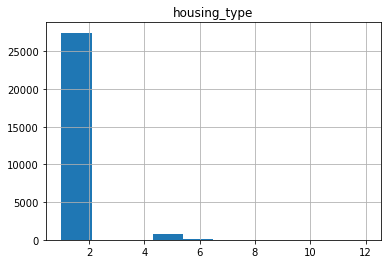

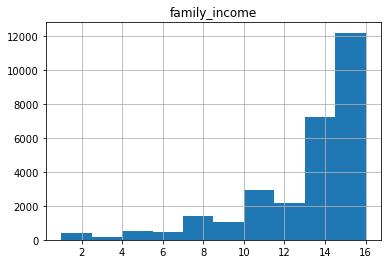

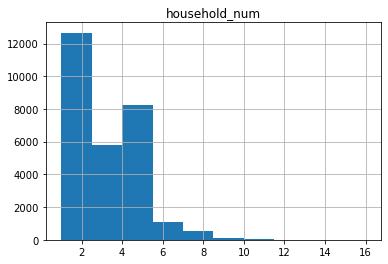

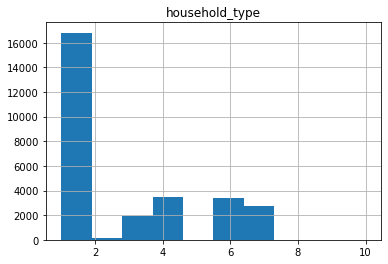

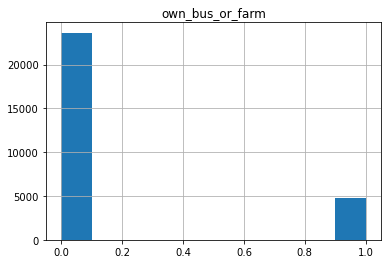

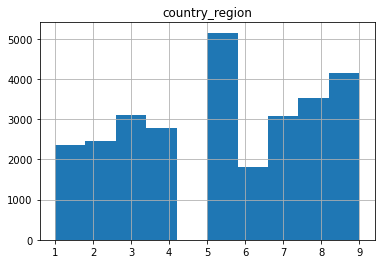

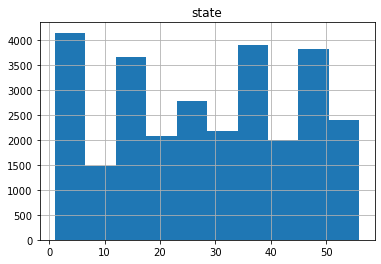

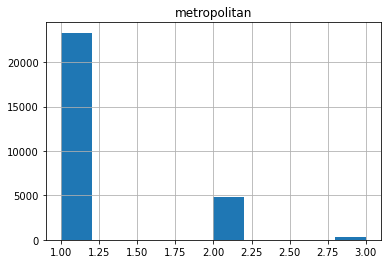

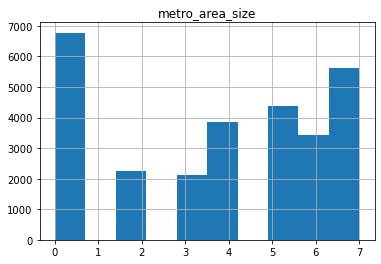

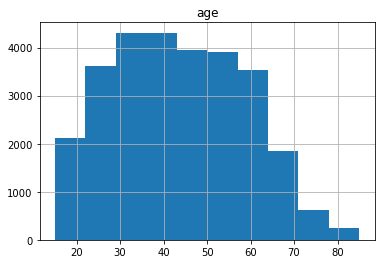

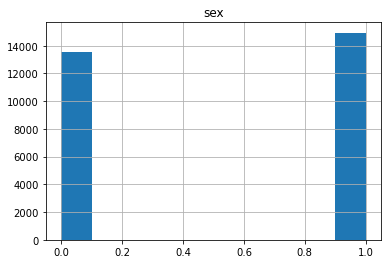

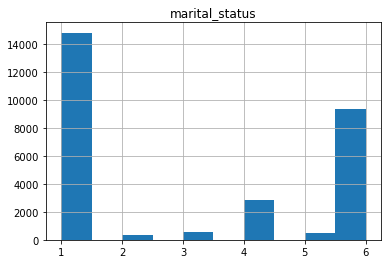

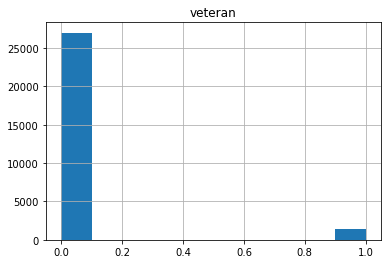

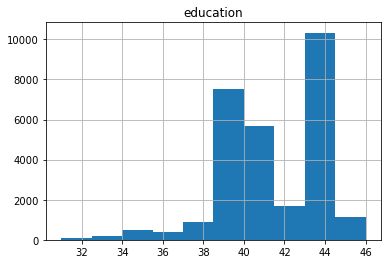

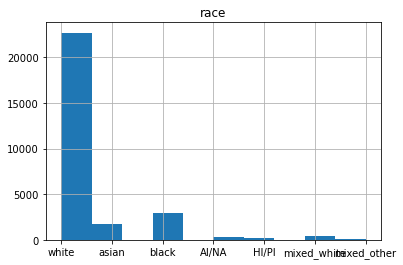

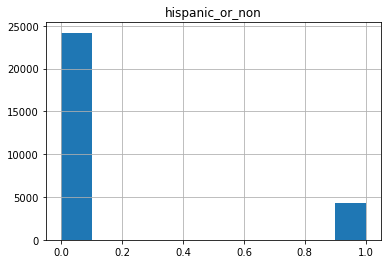

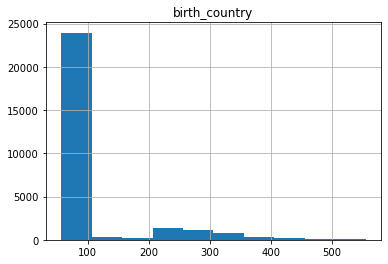

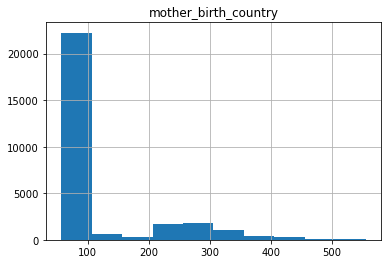

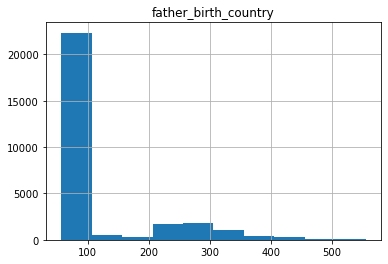

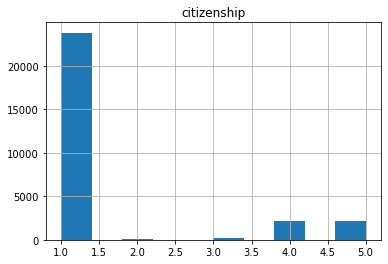

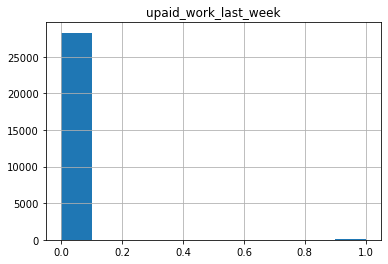

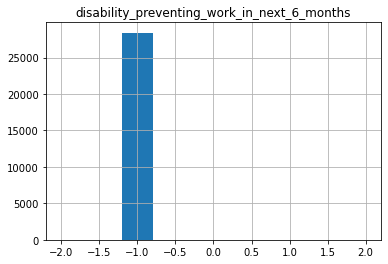

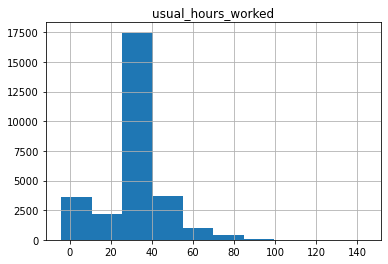

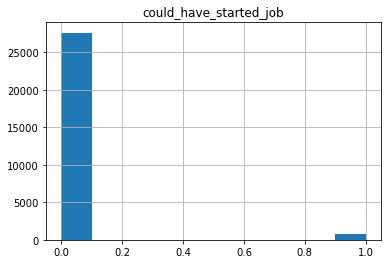

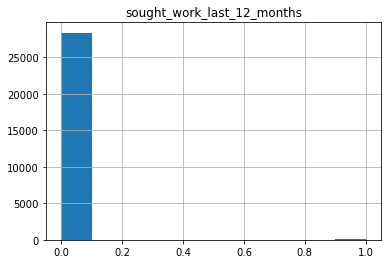

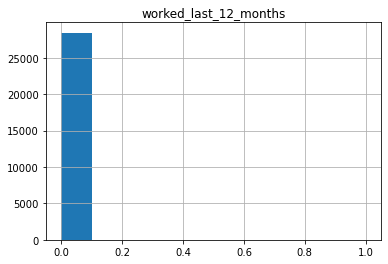

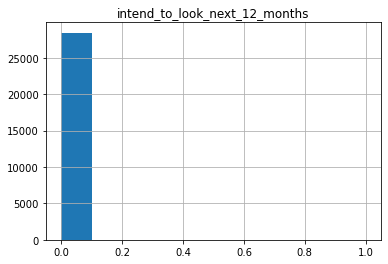

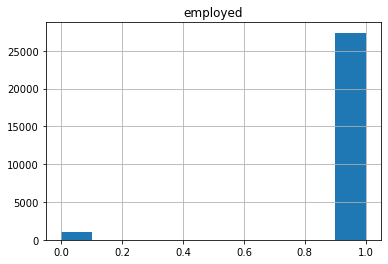

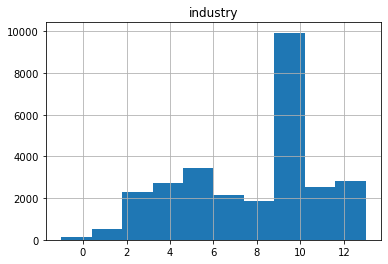

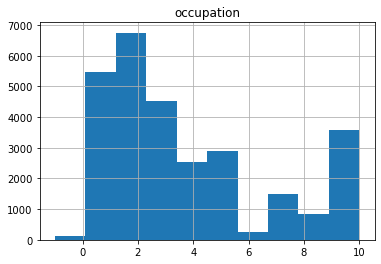

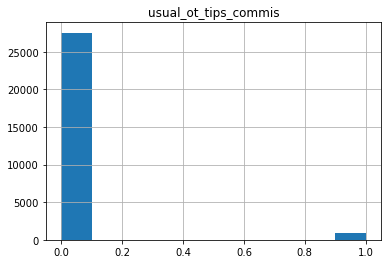

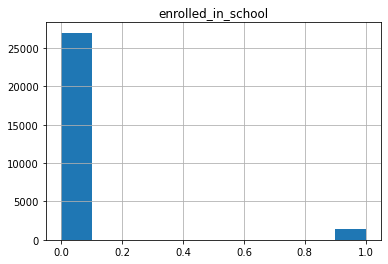

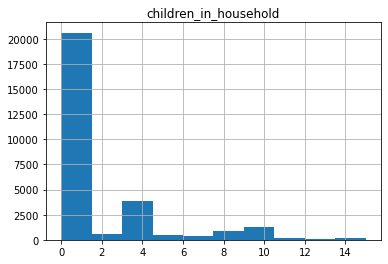

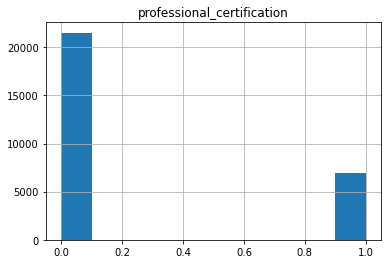

In [19]:
for col in train.columns:
    train[col].hist()
    plt.title(col)
    plt.show()

### Takeaways
* Skewed:
    - `family_income`, `household_num`, 'household_type`
* many responses from region 5 (south_atlantic)
* almost all respondents worked in last 12 months (train split)
* eliminate - `could_have_started_job`

## Bivariate - Pairplots 
* Examine variables in relationship to each other

In [25]:
# create column filter lists for plotting use

#fixing types on categorical columns
categorical_cols = ['housing_type','family_income','household_type',
                'country_region','state','metropolitan','metro_area_size',
                'marital_status','education','race','birth_country',
                'mother_birth_country','father_birth_country','citizenship',
                'industry','occupation']

binary_cols = ['own_bus_or_farm', 'sex', 'veteran','hispanic_or_non', 
        'upaid_work_last_week','could_have_started_job',
        'sought_work_last_12_months', 'worked_last_12_months',
        'intend_to_look_next_12_months','employed', 'usual_ot_tips_commis',
        'enrolled_in_school','professional_certification']  

continuous_cols = ['age', 'household_num', 'children_in_household'] 

In [23]:
def plot_continuous_pairs (df, col_list):
    """ 
    Purpose
        Plot pairwise relationships of zillow dataframe
        Ignores Categorical columns
    
    Parameters
        df: a dataframe containing zillow real estate data

    Returns
        None
    """

    #initialize a seaborn pairgrid
    g = sns.PairGrid(df[col_list])
    
    #fills out the pairgrid with a regplot
    g.map(sns.regplot, line_kws={'color':'r'})
    return 

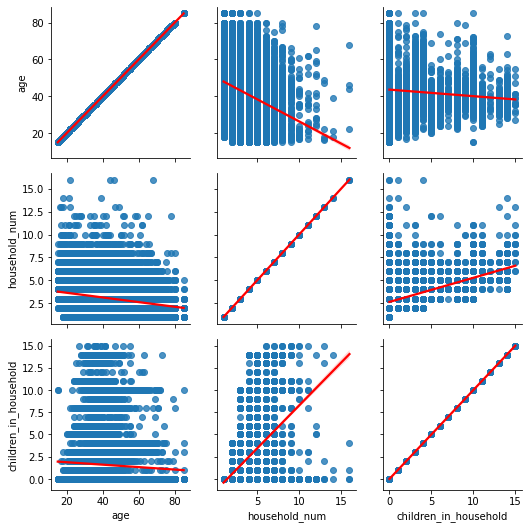

In [24]:
plot_continuous_pairs(train, continuous_cols)

### Takeaways
- Increases in age track with decreases in home size

## Bivariate - Categorical Plotting

In [30]:
unemployed = train[train.employed == 0]

<Figure size 1440x432 with 0 Axes>

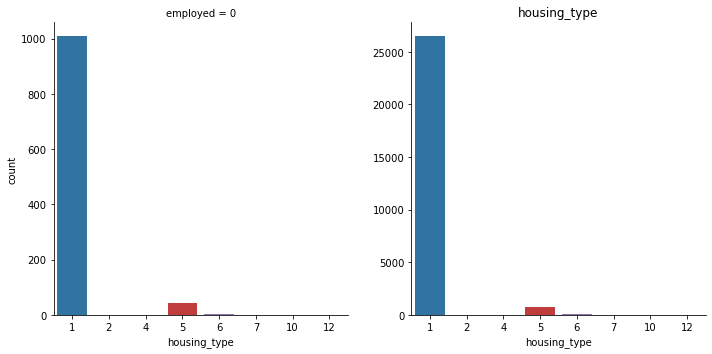

<Figure size 1440x432 with 0 Axes>

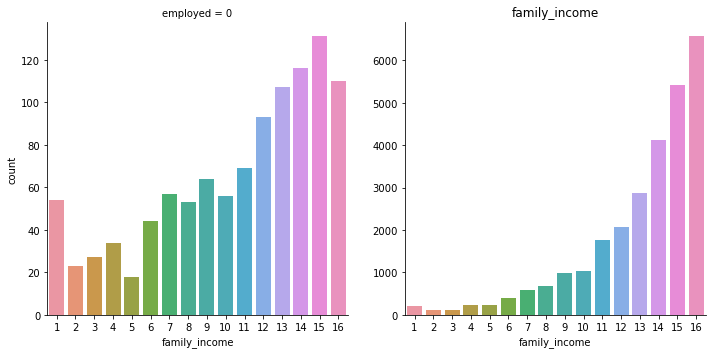

<Figure size 1440x432 with 0 Axes>

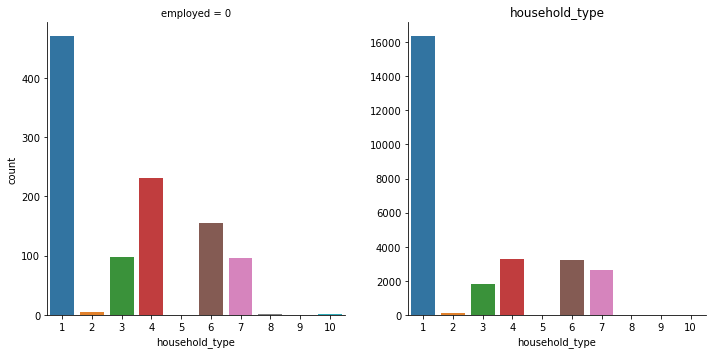

<Figure size 1440x432 with 0 Axes>

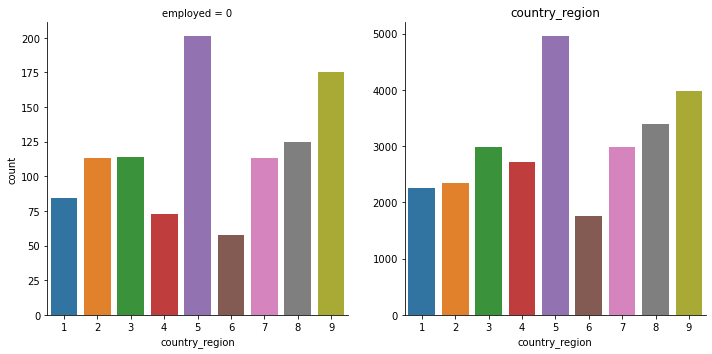

<Figure size 1440x432 with 0 Axes>

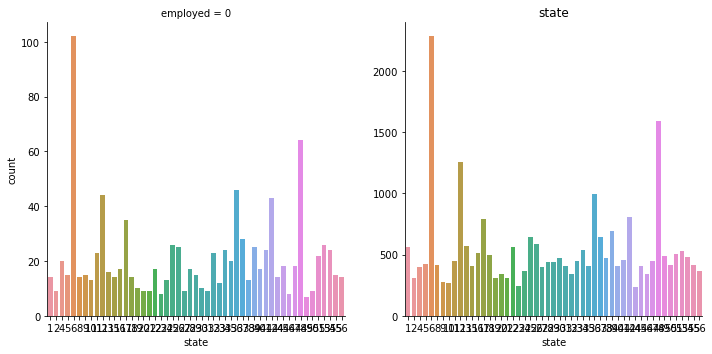

<Figure size 1440x432 with 0 Axes>

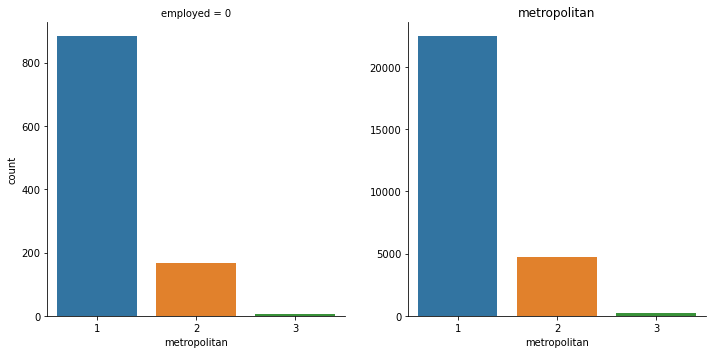

<Figure size 1440x432 with 0 Axes>

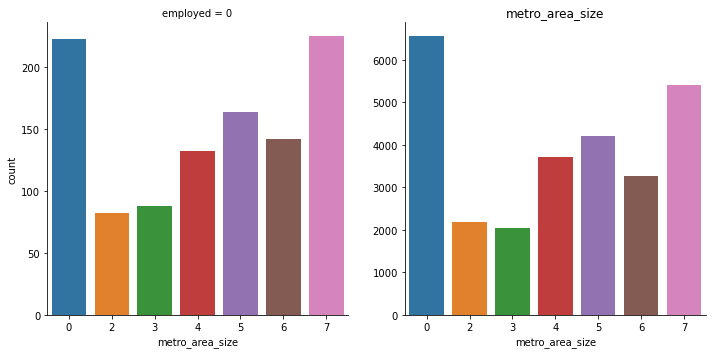

<Figure size 1440x432 with 0 Axes>

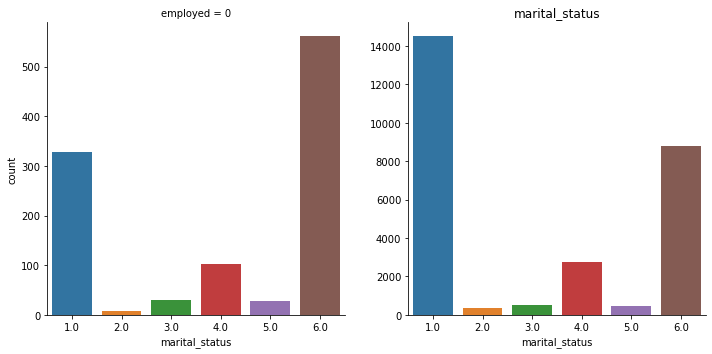

<Figure size 1440x432 with 0 Axes>

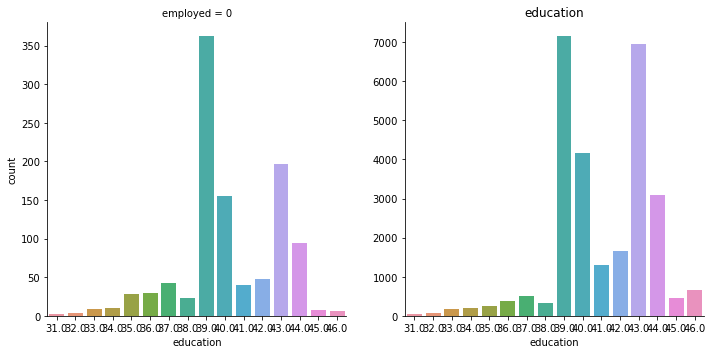

<Figure size 1440x432 with 0 Axes>

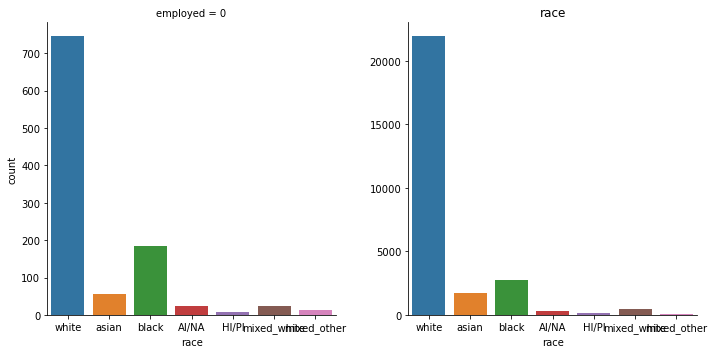

<Figure size 1440x432 with 0 Axes>

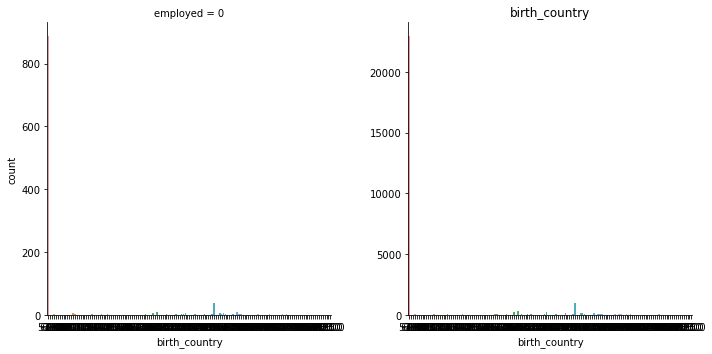

<Figure size 1440x432 with 0 Axes>

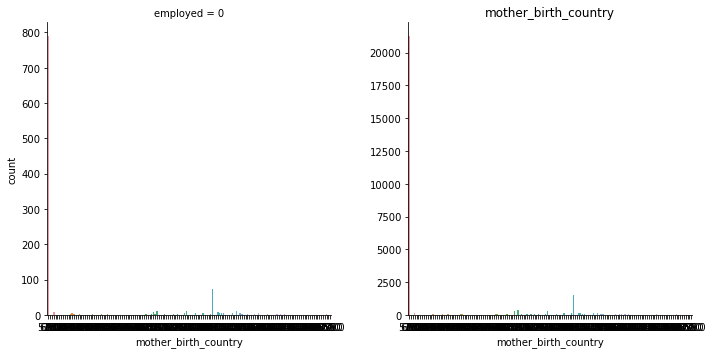

<Figure size 1440x432 with 0 Axes>

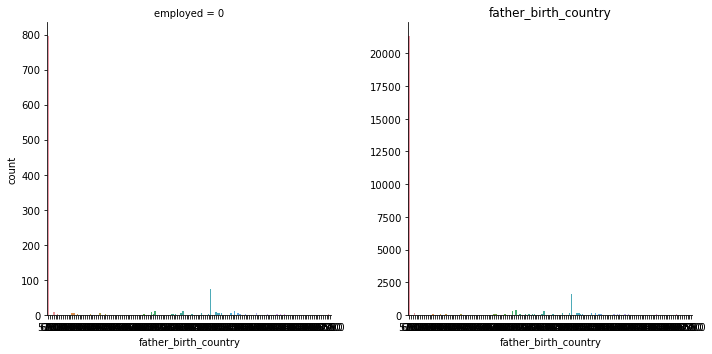

<Figure size 1440x432 with 0 Axes>

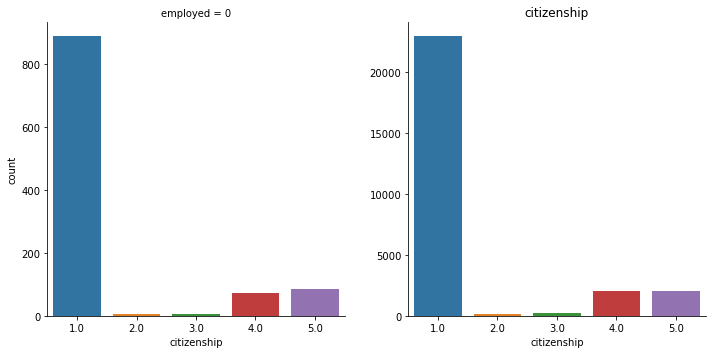

<Figure size 1440x432 with 0 Axes>

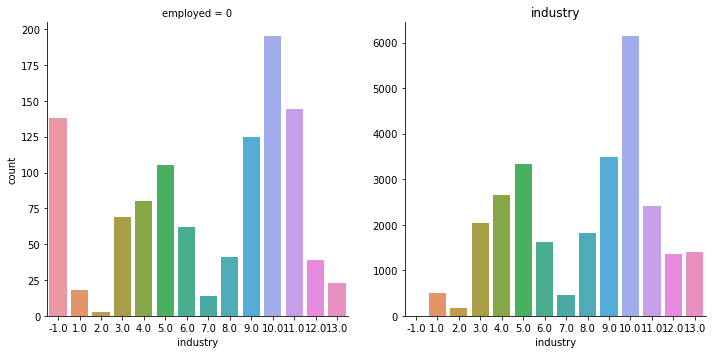

<Figure size 1440x432 with 0 Axes>

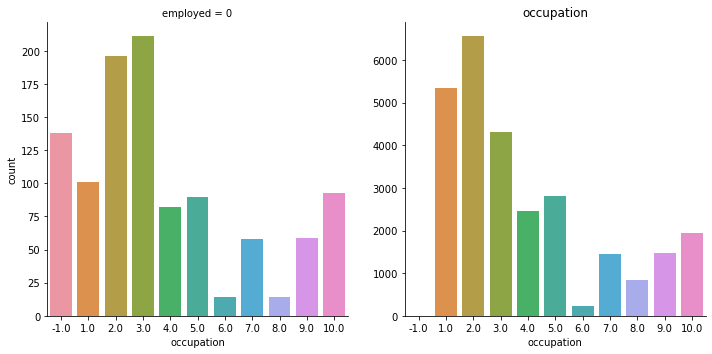

In [38]:
for col in train[categorical_cols]:
    plt.figure(figsize=(20,6))
    sns.catplot(data=train, x=col, col='employed', kind='count', sharey=False)
    #plt.axhline(y=train.employed.mean(), color='red', linestyle='dashed', label='Employement Percentage')
    plt.title(col)
    plt.show()

### Takeaways
* Look for proportionality differences between employed vs not
* Columns for closer inspection
    - `occupation`, `industry`, `marital_status`, `race` 

### Bivariate - Binary Columns

<Figure size 1440x432 with 0 Axes>

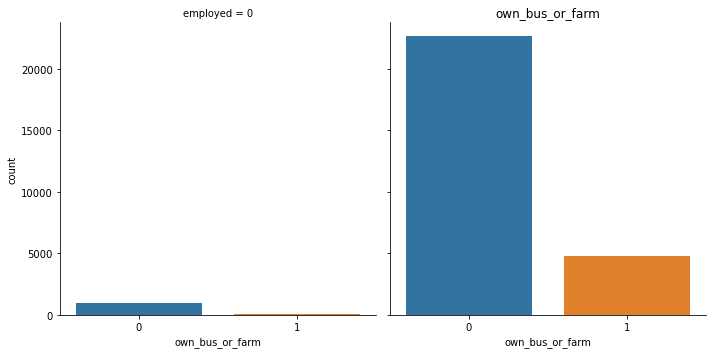

<Figure size 1440x432 with 0 Axes>

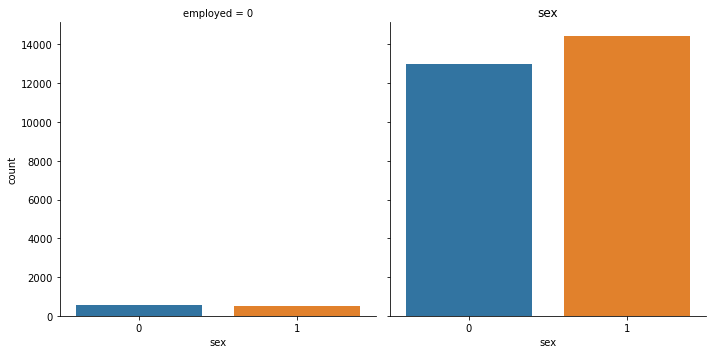

<Figure size 1440x432 with 0 Axes>

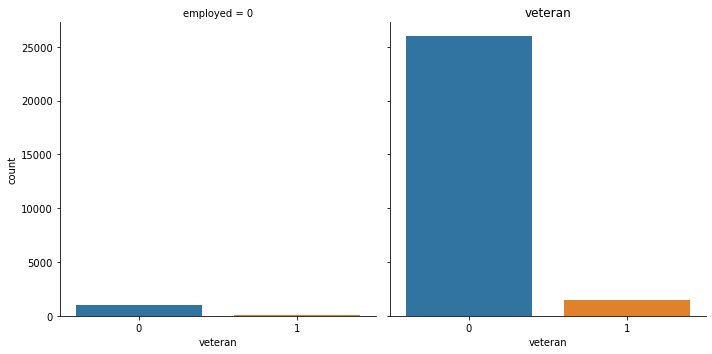

<Figure size 1440x432 with 0 Axes>

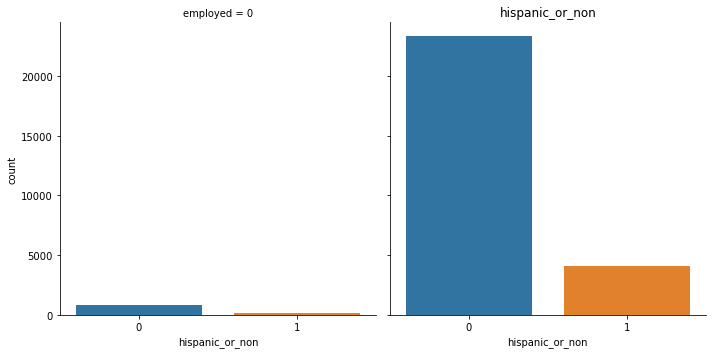

<Figure size 1440x432 with 0 Axes>

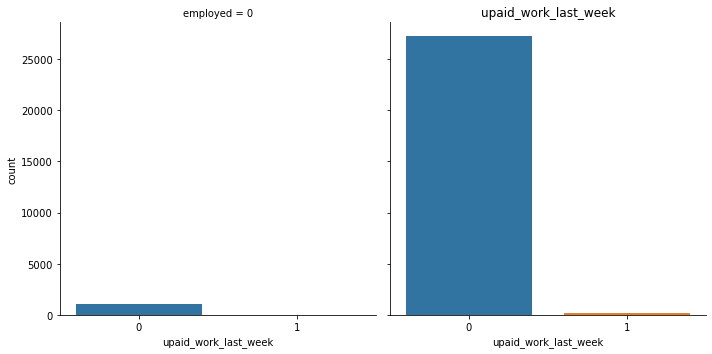

<Figure size 1440x432 with 0 Axes>

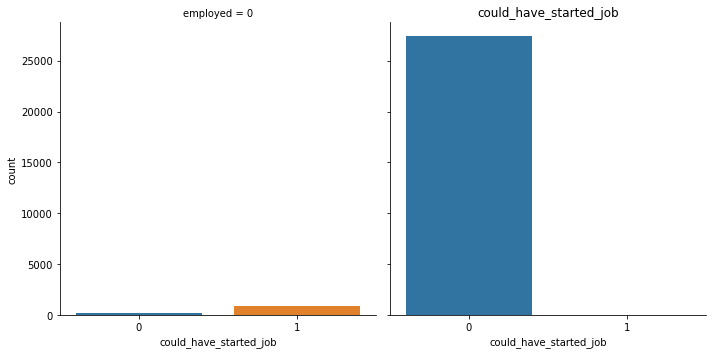

<Figure size 1440x432 with 0 Axes>

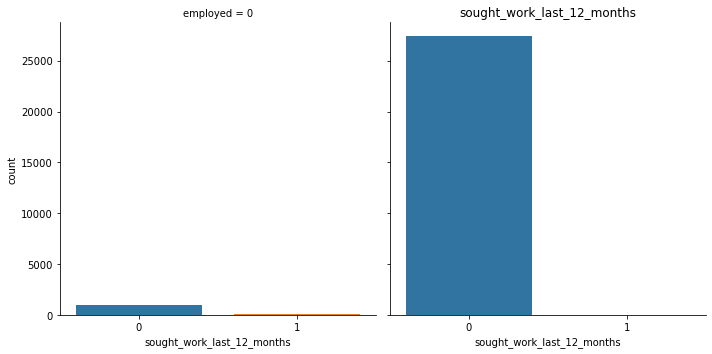

<Figure size 1440x432 with 0 Axes>

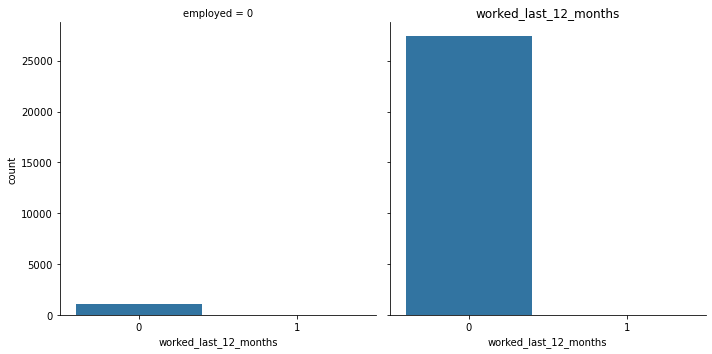

<Figure size 1440x432 with 0 Axes>

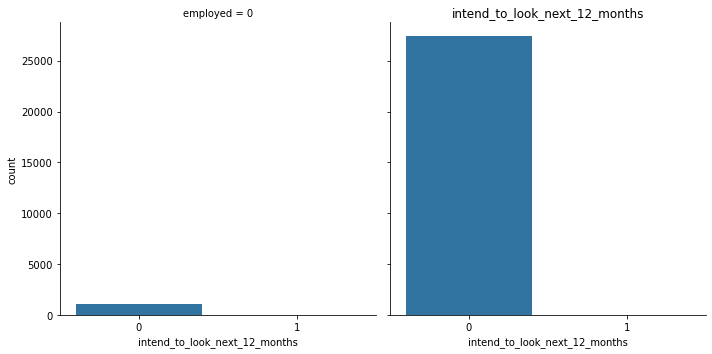

<Figure size 1440x432 with 0 Axes>

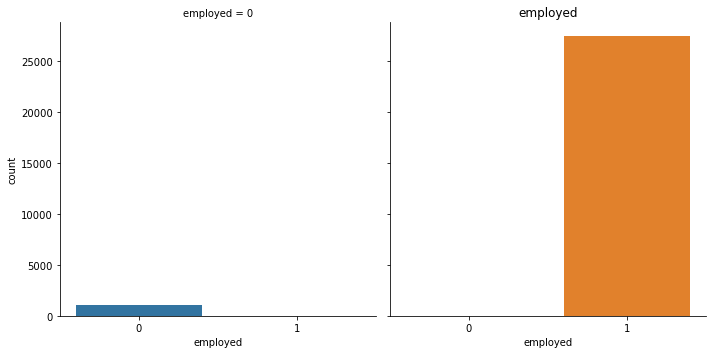

<Figure size 1440x432 with 0 Axes>

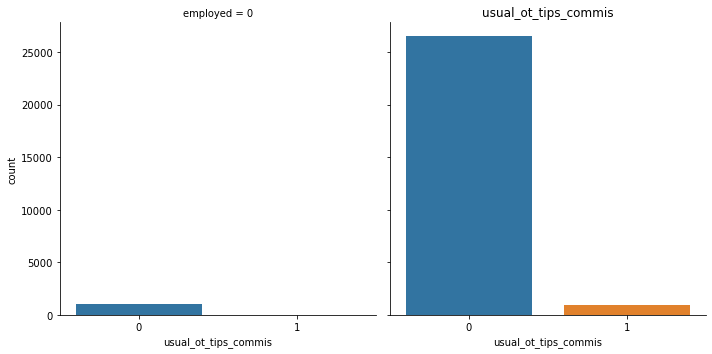

<Figure size 1440x432 with 0 Axes>

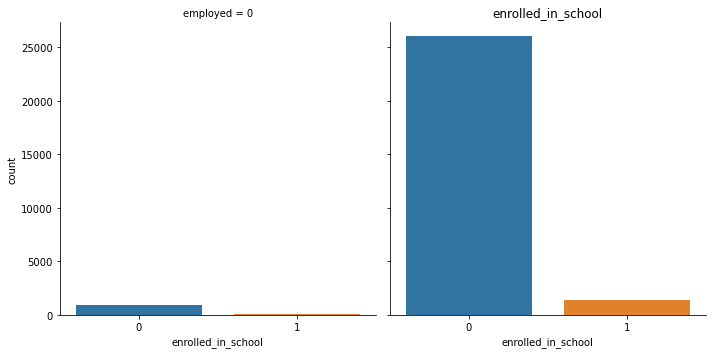

<Figure size 1440x432 with 0 Axes>

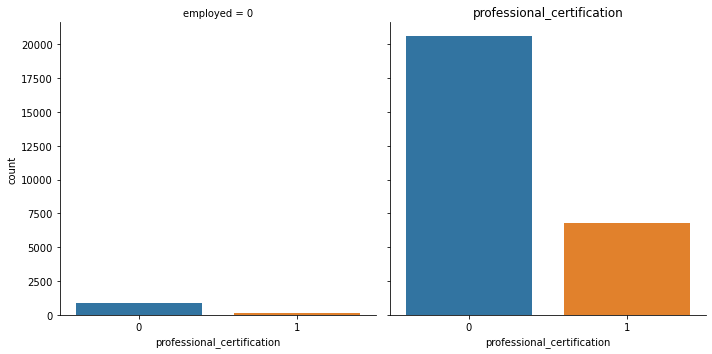

In [78]:
for col in train[binary_cols]:
    plt.figure(figsize=(20,6))
    sns.catplot(data=train, x=col, col='employed', kind='count', orient='y')
    
    #plt.axhline(y=train.employed.mean(), color='red', linestyle='dashed', label='Employement Percentage')
    plt.title(col)
    plt.show()

### Takeaways
* Gender reversal between employed and not,  change `sex` --> `is_female` 
* Columns for closer inspection 
    - `professional_certification`
* Remove columns: `could_have_started_job`, `sought_work_last_12_months`, `worked_last_12_months`, `intend_to_look_next_12_months`, `usual_ot_tips_commis`
    - all columns not represented at all among employed indivduals. leakage likely

## Specific Questions with plots and tests
* Flow:
    - Chi-2 --> t-test --> feature inclusion
* can bin interesting vs not intersting during feature selection for features the have categories that deviate 

### Spotlight - Industry
* Which industry shows the largest percentage change between employed and unemployed?

#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between industry of typical employment and employment status   
>* ${H_a}$: There is a relationship between industry of typical employment and employment status  
>* ${\alpha}$: .05  
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

In [45]:
round(1 - train.groupby(by='industry').employed.mean().sort_values(ascending=True), 2)

industry
-1.0     1.00
 11.0    0.06
 6.0     0.04
 9.0     0.03
 1.0     0.03
 3.0     0.03
 10.0    0.03
 5.0     0.03
 7.0     0.03
 4.0     0.03
 12.0    0.03
 8.0     0.02
 2.0     0.02
 13.0    0.02
Name: employed, dtype: float64

In [66]:
# i want to show the proportion of the population that each industry is
train[train.employed == 1]['industry'].value_counts(normalize=True) 

10.0    0.223954
9.0     0.126999
5.0     0.121742
4.0     0.097211
11.0    0.087902
3.0     0.074213
8.0     0.066292
6.0     0.058955
13.0    0.051325
12.0    0.049865
1.0     0.018617
7.0     0.016902
2.0     0.006023
Name: industry, dtype: float64

In [67]:
# i want to show the proportion of the population that each industry is
train[train.employed == 0]['industry'].value_counts(normalize=True) 

 10.0    0.184659
 11.0    0.136364
-1.0     0.130682
 9.0     0.118371
 5.0     0.099432
 4.0     0.075758
 3.0     0.065341
 6.0     0.058712
 8.0     0.038826
 12.0    0.036932
 13.0    0.021780
 1.0     0.017045
 7.0     0.013258
 2.0     0.002841
Name: industry, dtype: float64

In [68]:
# change in employed vs unemployed proportion
train[train.employed == 1]['industry'].value_counts(normalize=True) - train[train.employed == 0]['industry'].value_counts(normalize=True) 

-1.0          NaN
 1.0     0.001572
 2.0     0.003182
 3.0     0.008872
 4.0     0.021453
 5.0     0.022310
 6.0     0.000242
 7.0     0.003644
 8.0     0.027466
 9.0     0.008627
 10.0    0.039295
 11.0   -0.048461
 12.0    0.012933
 13.0    0.029545
Name: industry, dtype: float64

#### Statistical Testing

In [93]:
#chi2

alpha = .05

crosstab = pd.crosstab(df['industry'], df["employed"])

chi2, p, dof, expected = chi2_contingency(crosstab)

print('Crosstab\n')
print(crosstab.values)
print('---\nExpected\n')
print(f'{expected.astype(int)}')
print('---\n')
print(f'chi^2: {chi2:.4f}')
print(f'p: {p:.4f}')
print(f'degrees of freedom: {dof}')

if p < alpha :
    print('Reject null hypothesis')
else: 
    print('Fail to reject null hypothesis')


Crosstab

[[  250     0]
 [   34   867]
 [    9   281]
 [  126  3638]
 [  142  4620]
 [  206  6044]
 [  107  2869]
 [   22   830]
 [   66  3259]
 [  207  6277]
 [  351 10889]
 [  251  4275]
 [   75  2499]
 [   35  2573]
 [    4     0]]
---
Expected

[[    9   240]
 [   33   867]
 [   10   279]
 [  139  3624]
 [  176  4585]
 [  231  6018]
 [  110  2865]
 [   31   820]
 [  123  3201]
 [  240  6243]
 [  417 10822]
 [  167  4358]
 [   95  2478]
 [   96  2511]
 [    0     3]]
---

chi^2: 6738.5352
p: 0.0000
degrees of freedom: 14
Reject null hypothesis


#### Takeaways
* `Leisure and hospitality` with highest unemployment rate, highest jump in proportionality
* `Transportaion and utilities` with 2nd highest

### Area - Occupation?
* Which occupations show the largest percentage change between employed and unemployed?

#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between occupation and employment status  
>* ${H_a}$: There is a relationship between occupation and employment status  
>* ${\alpha}$: .05
>* Result: 

In [49]:
round(1 - train.groupby(by='occupation').employed.mean().sort_values(ascending=True), 2).head(5)

occupation
-1.0     1.00
 6.0     0.06
 3.0     0.05
 10.0    0.05
 9.0     0.04
Name: employed, dtype: float64

In [75]:
# change in employed vs unemployed proportion
train[train.employed == 1]['occupation'].value_counts(normalize=True) - train[train.employed == 0]['occupation'].value_counts(normalize=True) 

-1.0          NaN
 1.0     0.099691
 2.0     0.053570
 3.0    -0.042878
 4.0     0.012186
 5.0     0.017459
 6.0    -0.005044
 7.0    -0.002029
 8.0     0.017078
 9.0    -0.002319
 10.0   -0.017031
Name: occupation, dtype: float64

#### Statistical Testing

In [94]:
#chi2

alpha = .05

crosstab = pd.crosstab(df['occupation'], df["employed"])

chi2, p, dof, expected = chi2_contingency(crosstab)

print('Crosstab\n')
print(crosstab.values)
print('---\nExpected\n')
print(f'{expected.astype(int)}')
print('---\n')
print(f'chi^2: {chi2:.4f}')
print(f'p: {p:.4f}')
print(f'degrees of freedom: {dof}')

if p < alpha :
    print('Reject null hypothesis')
else: 
    print('Fail to reject null hypothesis')


Crosstab

[[  250     0]
 [  154  9383]
 [  338 11900]
 [  375  7682]
 [  156  4423]
 [  159  4988]
 [   26   373]
 [  117  2549]
 [   25  1538]
 [  102  2564]
 [  179  3521]
 [    4     0]]
---
Expected

[[    9   240]
 [  353  9183]
 [  454 11783]
 [  298  7758]
 [  169  4409]
 [  190  4956]
 [   14   384]
 [   98  2567]
 [   57  1505]
 [   98  2567]
 [  137  3562]
 [    0     3]]
---

chi^2: 6811.8559
p: 0.0000
degrees of freedom: 11
Reject null hypothesis


### Takeways
* Farming fishing and forestry at the top
* service occupations, transportation and material movie tied for 2nd
* service occupations highest change in proportionality

### Spotlight - Marital Status
* Which occupations show the largest percentage change between employed and unemployed?
  
#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between `marital_status` and `employment` status   
>* ${H_a}$: There is a relationship between `marital_status` and `employment` status  
>* ${\alpha}$: .05  
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

In [51]:
round(1 - train.groupby(by='marital_status').employed.mean().sort_values(ascending=True), 2).head(5)

marital_status
6.0    0.06
5.0    0.06
3.0    0.06
4.0    0.04
1.0    0.02
Name: employed, dtype: float64

In [76]:
# change in employed vs unemployed proportion
train[train.employed == 1]['marital_status'].value_counts(normalize=True) - train[train.employed == 0]['marital_status'].value_counts(normalize=True) 

1.0    0.217614
2.0    0.006951
3.0   -0.009719
4.0    0.004198
5.0   -0.009287
6.0   -0.209756
Name: marital_status, dtype: float64

#### Statistical Testing

In [95]:
#chi2

alpha = .05

crosstab = pd.crosstab(df['marital_status'], df["employed"])

chi2, p, dof, expected = chi2_contingency(crosstab)

print('Crosstab\n')
print(crosstab.values)
print('---\nExpected\n')
print(f'{expected.astype(int)}')
print('---\n')
print(f'chi^2: {chi2:.4f}')
print(f'p: {p:.4f}')
print(f'degrees of freedom: {dof}')

if p < alpha :
    print('Reject null hypothesis')
else: 
    print('Fail to reject null hypothesis')


Crosstab

[[  561 25913]
 [   18   671]
 [   58   939]
 [  181  4921]
 [   45   832]
 [ 1022 15645]]
---
Expected

[[  982 25491]
 [   25   663]
 [   36   960]
 [  189  4912]
 [   32   844]
 [  618 16048]]
---

chi^2: 481.2599
p: 0.0000
degrees of freedom: 5
Reject null hypothesis


#### Takeaways
* `Leisure and hospitality` with highest unemployment rate, highest jump in proportionality
* `Transportaion and utilities` with 2nd highest

### Spotlight - Race
* Which racial groups show the largest percentage change between employed and unemployed?
  
#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between `race` and `employment` status   
>* ${H_a}$: There is a relationship between `race` and `employment` status   
>* ${\alpha}$: .05  
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

In [50]:
round(1 - train.groupby(by='race').employed.mean().sort_values(ascending=True), 2).head(5)

race
mixed_other    0.12
AI/NA          0.07
black          0.06
HI/PI          0.06
mixed_white    0.06
Name: employed, dtype: float64

In [77]:
# change in employed vs unemployed proportion
train[train.employed == 1]['race'].value_counts(normalize=True) - train[train.employed == 0]['race'].value_counts(normalize=True) 

AI/NA         -0.010900
HI/PI         -0.002974
asian          0.011288
black         -0.075788
mixed_other   -0.008843
mixed_white   -0.008160
white          0.095376
Name: race, dtype: float64

#### Statistical Testing

In [96]:
#chi2

alpha = .05

crosstab = pd.crosstab(df['race'], df["employed"])

chi2, p, dof, expected = chi2_contingency(crosstab)

print('Crosstab\n')
print(crosstab.values)
print('---\nExpected\n')
print(f'{expected.astype(int)}')
print('---\n')
print(f'chi^2: {chi2:.4f}')
print(f'p: {p:.4f}')
print(f'degrees of freedom: {dof}')

if p < alpha :
    print('Reject null hypothesis')
else: 
    print('Fail to reject null hypothesis')


Crosstab

[[   39   552]
 [   12   262]
 [   94  3162]
 [  333  4781]
 [   19   157]
 [   44   739]
 [ 1344 39268]]
---
Expected

[[   21   569]
 [   10   263]
 [  120  3135]
 [  189  4924]
 [    6   169]
 [   29   753]
 [ 1506 39105]]
---

chi^2: 183.6449
p: 0.0000
degrees of freedom: 6
Reject null hypothesis


#### Takeaways
* `Leisure and hospitality` with highest unemployment rate, highest jump in proportionality
* `Transportaion and utilities` with 2nd highest

#### Takeways
* Mixed raced top of unemployed
* indeginous, black, and hi/pi among tops in unemployment
* black with highest change in proportionality 

### Spotlight - Professional Certification
* What is the affect of having a professional certification? 

#### Statistical Hypothesis
>${H_0}$: There is no relationship between having a `professional_certification` and `employment`
>${H_a}$: There is a relationship between having a `professional_certification` and `employment`  
>${\alpha}$: .05

In [52]:
round(1 - train.groupby(by='professional_certification').employed.mean().sort_values(ascending=True), 2).head(5)

professional_certification
0    0.04
1    0.02
Name: employed, dtype: float64

#### Statistical Testing

In [97]:
#chi2

alpha = .05

crosstab = pd.crosstab(df['professional_certification'], df["employed"])

chi2, p, dof, expected = chi2_contingency(crosstab)

print('Crosstab\n')
print(crosstab.values)
print('---\nExpected\n')
print(f'{expected.astype(int)}')
print('---\n')
print(f'chi^2: {chi2:.4f}')
print(f'p: {p:.4f}')
print(f'degrees of freedom: {dof}')

if p < alpha :
    print('Reject null hypothesis')
else: 
    print('Fail to reject null hypothesis')


Crosstab

[[ 1619 36658]
 [  266 12263]]
---
Expected

[[ 1420 36856]
 [  464 12064]]
---

chi^2: 116.6670
p: 0.0000
degrees of freedom: 1
Reject null hypothesis


#### Takeways
* Double the unemployment rate for those without a professional_certification
* service occupations, transportation and material movoie tied for 2nd